# Challenge Set 3
### Topic:        Linear Splitting 1
### Date:         07/25/2016
### Name:         Ahmed El-Razi
### Worked with:  N/A

## Challenge 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/El-Razi/ds/metis/nyc16_ds8/challenges/challenges_data/2013_movies.csv')

In [3]:
df['DomesticTotalGross'] /= 1000000

In [4]:
df['Ones'] = 1

In [5]:
X,y = df['Ones'], df['DomesticTotalGross']
model = smf.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 26 Jul 2016   Prob (F-statistic):                nan
Time:                        06:56:17   Log-Likelihood:                -588.44
No. Observations:                 100   AIC:                             1179.
Df Residuals:                      99   BIC:                             1181.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Ones         100.5969      8.740     11.510      0.000        83.256   117.938
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### There is not an interpretation for these results. The model doesn't predict anything, as the feature never changes. Regression tries to predict how a label changes in relation to a feature changing. That's why we have a 0 coefficient here. The score (r-squared) indicates that the model explains none of the variability.

In [6]:
df['Pred'] = results.predict(df['Ones'])

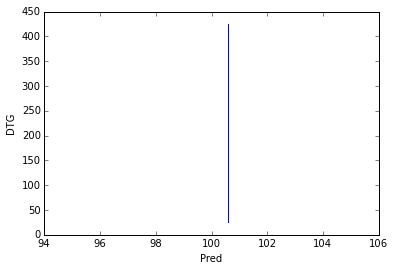

In [7]:
plt.xlabel('Pred')
plt.ylabel('DTG')
plt.plot(df['Pred'],df['DomesticTotalGross'],)

In [8]:
df['Resid'] = results.resid

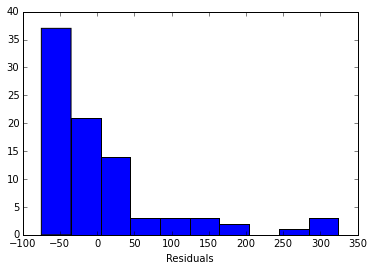

In [43]:
plt.hist(df['Resid'])
plt.xlabel('Residuals')

##### The residuals are positively skewed.

## Challenge 2

In [14]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Ones,Pred,Resid
0,The Hunger Games: Catching Fire,130,424.668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,100.596875,324.071172
1,Iron Man 3,200,409.013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,100.596875,308.417119
2,Frozen,150,400.738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,100.596875,300.141134
3,Despicable Me 2,76,368.061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,100.596875,267.464390
4,Man of Steel,225,291.045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,100.596875,190.448643


In [11]:
# Budget is one of the only continuous variables. Values missing.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null float64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
Ones                  100 non-null int64
Pred                  100 non-null float64
Resid                 100 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 8.6+ KB


In [12]:
df = df.dropna()

In [13]:
df['Budget'] /= 1000000

In [15]:
X2,y2 = df['Budget'],df['DomesticTotalGross']
model2 = smf.ols(formula='DomesticTotalGross ~ Budget',data=df)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Tue, 26 Jul 2016   Prob (F-statistic):           1.19e-07
Time:                        06:57:46   Log-Likelihood:                -498.02
No. Observations:                  87   AIC:                             1000.
Df Residuals:                      85   BIC:                             1005.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     44.4306     13.000      3.418      0.001        18.582    70.279
Budget         0.7831      0.135      5.782      0.000         0.514     1.052
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
df['Pred2'] = results2.predict()

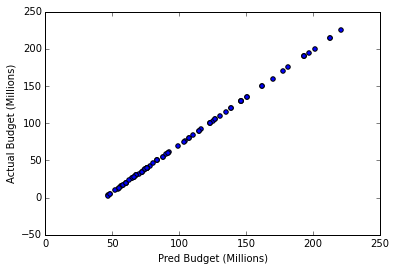

In [41]:
plt.scatter(df.Pred2,df.Budget)
plt.xlabel('Pred Budget (Millions)')
plt.ylabel('Actual Budget (Millions)')

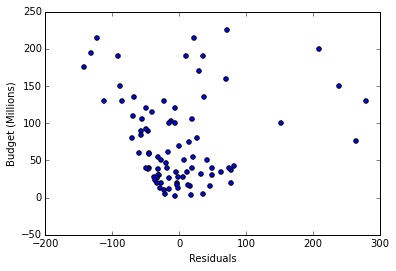

In [42]:
plt.scatter(results2.resid,df.Budget)
plt.xlabel('Residuals')
plt.ylabel('Budget (Millions)')

This model is not very good. For starters, the r-squared is about 28%. Durbin-Watson and pattern in the residual plot suggest autocorrelation. The predicted vs. actual value plot suggests that the model is much better than it actually is. The diagonality of the line represents how 1:1 the predicted and observed values are, but that is not what is reflected in the output table from statsmodels.

In [44]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Ones,Pred,Resid,Pred2
0,The Hunger Games: Catching Fire,130,424.668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,100.596875,324.071172,146.227776
1,Iron Man 3,200,409.013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,100.596875,308.417119,201.041626
2,Frozen,150,400.738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,100.596875,300.141134,161.888876
3,Despicable Me 2,76,368.061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,100.596875,267.464390,103.942806
4,Man of Steel,225,291.045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,100.596875,190.448643,220.618001


## Challenge 3

In [45]:
from patsy import dmatrices

In [53]:
# Reset DF to put back dropped observations
df = pd.read_csv('/Users/El-Razi/ds/metis/nyc16_ds8/challenges/challenges_data/2013_movies.csv')

In [54]:
y3, X3 = dmatrices('DomesticTotalGross ~ Rating', data=df, return_type='dataframe')

In [55]:
X3.head()

,Intercept,Rating[T.PG],Rating[T.PG-13],Rating[T.R]
0,1,0,1,0
1,1,0,1,0
2,1,1,0,0
3,1,1,0,0
4,1,0,1,0


In [56]:
model3 = smf.ols(formula='DomesticTotalGross ~ Rating',data=df)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.924
Date:                Tue, 26 Jul 2016   Prob (F-statistic):             0.0109
Time:                        07:47:00   Log-Likelihood:                -1964.2
No. Observations:                 100   AIC:                             3936.
Df Residuals:                      96   BIC:                             3947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        2.685e+08   8.38e+07      3.205      0.002      1.02e+08  4.35e+08
Rating[T.PG]    -1.374e+08   8.65e+07     -1.588      0.116     -3.09e+08  3.44e+07
Rating[T.PG-13]  -1.57e+08   8.47e+07     -1.855      0.067     -3.25e+08   1.1e+07
Rating[T.R]     -1.986e+08   8.49e+07     -2.340      0.021     -3.67e+08 -3.01e+07
==============================================================================
Omnibus:                       46.897   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.261
Skew:                           1.826   Prob(JB):                     1.88e-24
Kurtosis:                       6.589   Cond. No.                         23.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model explains less of the variance than the previous two models. The PG and PG-13 variables are not significant predictors of Domestic Total Gross. The R variable does appear to significantly predict DTG.